# Deep Learning: A Simple Example

- Let's get back to the Name Gender Classifier.

![](../images/keras-workflow.png)

## Prepare Data

In [29]:
import numpy as np
import nltk
import random

In [30]:
with open("../../../RepositoryData/data/_ENC2045_DATA/chinese_name_gender.txt") as f:
    labeled_names = [l.replace('\n','').split(',') for l in f.readlines() if len(l.split(','))==2]

In [31]:
labeled_names =[(n, 1) if g=="男" else (n, 0) for n, g in labeled_names]

In [32]:
labeled_names[:10]

[('阿貝貝', 0),
 ('阿彬彬', 1),
 ('阿斌斌', 1),
 ('阿冰冰', 0),
 ('阿波波', 1),
 ('阿超超', 1),
 ('阿春兒', 0),
 ('阿達禮', 1),
 ('阿丹丹', 0),
 ('阿丹兒', 0)]

In [33]:
random.shuffle(labeled_names)

## Train-Test Split

In [34]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(labeled_names, test_size = 0.2, random_state=42)
print(len(train_set), len(test_set))

732516 183129


In [35]:
import tensorflow as tf
import tensorflow.keras as keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical, plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, RNN, GRU
from keras.layers import Embedding
from keras.layers import SpatialDropout1D

In [36]:
names = [n for (n, l) in train_set]
labels = [l for (n, l) in train_set] 

In [37]:
len(names)

732516

In [90]:
nltk.FreqDist(labels)

FreqDist({1: 475272, 0: 257244})

## Tokenizer

- By default, the token index 0 is reserved for padding token.
- If `oov_token` is specified, it is default to index 1.
- Specify `num_words` for tokenizer to include only top N words in the model
- Tokenizer will automatically remove puntuations.
- Tokenizer use whitespace as word delimiter.
- If every character is treated as a token, specify `char_level=True`.

In [38]:
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(names)

## Prepare Input and Output Tensors

- Like in feature-based machine translation, a computational model only accepts numeric values. It is necessary to convert raw text to numeric tensor for neural network.
- After we create the Tokenizer, we use the Tokenizer to perform text vectorization, i.e., converting texts into tensors.
- In deep learning, words or characters are automatically converted into numeric representations.
- In other words, the feature engineering step is fully automatic.

### Two Ways of Text Vectorization

- Texts to Sequences: **Integer encoding** of tokens in texts and learn token **embeddings**
- Texts to Matrix: **One-hot encoding** of texts (similar to bag-of-words model)


## Method 1: Text to Sequences

### From Texts and Sequences

- Text to Sequences
- Padding to uniform lengths for each text

In [39]:
names_ints = tokenizer.texts_to_sequences(names)

In [40]:
print(names[:10])
print(names_ints[:10])
print(labels[:10])

['李照華', '宋朝輝', '諸葛偉', '林振杰', '石星星', '謝昕昕', '俞銀兒', '齊春輝', '林紫馨', '羅偉生']
[[2, 585, 10], [78, 250, 48], [918, 340, 18], [7, 95, 749], [197, 228, 228], [73, 641, 641], [330, 242, 458], [327, 28, 48], [7, 525, 542], [63, 18, 50]]
[1, 1, 1, 1, 1, 0, 0, 1, 0, 1]


### Vocabulary

In [41]:
# determine the vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 2241


In [42]:
tokenizer.word_index

{'王': 1,
 '李': 2,
 '張': 3,
 '陳': 4,
 '劉': 5,
 '文': 6,
 '林': 7,
 '明': 8,
 '楊': 9,
 '華': 10,
 '黃': 11,
 '吳': 12,
 '金': 13,
 '曉': 14,
 '周': 15,
 '國': 16,
 '趙': 17,
 '偉': 18,
 '海': 19,
 '玉': 20,
 '志': 21,
 '徐': 22,
 '麗': 23,
 '建': 24,
 '紅': 25,
 '平': 26,
 '英': 27,
 '春': 28,
 '軍': 29,
 '朱': 30,
 '孫': 31,
 '龍': 32,
 '永': 33,
 '胡': 34,
 '德': 35,
 '榮': 36,
 '東': 37,
 '成': 38,
 '雲': 39,
 '芳': 40,
 '郭': 41,
 '鄭': 42,
 '馬': 43,
 '高': 44,
 '新': 45,
 '梅': 46,
 '何': 47,
 '輝': 48,
 '秀': 49,
 '生': 50,
 '玲': 51,
 '傑': 52,
 '世': 53,
 '俊': 54,
 '強': 55,
 '光': 56,
 '洪': 57,
 '江': 58,
 '豔': 59,
 '燕': 60,
 '慶': 61,
 '子': 62,
 '羅': 63,
 '蘭': 64,
 '峯': 65,
 '忠': 66,
 '宇': 67,
 '鳳': 68,
 '清': 69,
 '霞': 70,
 '美': 71,
 '祥': 72,
 '謝': 73,
 '興': 74,
 '立': 75,
 '萍': 76,
 '梁': 77,
 '宋': 78,
 '雪': 79,
 '良': 80,
 '家': 81,
 '福': 82,
 '葉': 83,
 '慧': 84,
 '許': 85,
 '娟': 86,
 '飛': 87,
 '佳': 88,
 '寶': 89,
 '學': 90,
 '安': 91,
 '亞': 92,
 '波': 93,
 '珍': 94,
 '振': 95,
 '鵬': 96,
 '敏': 97,
 '元': 98,
 '利': 99,
 '蔡': 100,
 '斌': 10

### Padding

- When padding the all texts into uniform lengths, consider whether to Pre-padding or removing values from the beginning of the sequence (i.e., `pre`) or the other way (`post`).
-  Check `padding` and `truncating` parameters in `pad_sequences`

李照華


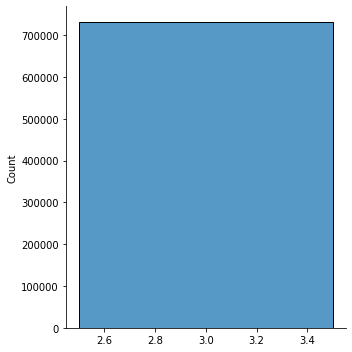

In [43]:
names_lens=[len(n) for n in names_ints]
names_lens
import seaborn as sns
sns.displot(names_lens)
print(names[np.argmax(names_lens)]) # longest name

In [44]:
max_len = names_lens[np.argmax(names_lens)]
max_len

3

In [45]:
names_ints_pad = sequence.pad_sequences(names_ints, maxlen = max_len)
names_ints_pad[:10]

array([[  2, 585,  10],
       [ 78, 250,  48],
       [918, 340,  18],
       [  7,  95, 749],
       [197, 228, 228],
       [ 73, 641, 641],
       [330, 242, 458],
       [327,  28,  48],
       [  7, 525, 542],
       [ 63,  18,  50]], dtype=int32)

### Define X and Y

In [46]:
X_train = np.array(names_ints_pad).astype('int32')
y_train = np.array(labels)

X_test = np.array(sequence.pad_sequences(
    tokenizer.texts_to_sequences([n for (n,l) in test_set]),
    maxlen = max_len)).astype('int32')
y_test = np.array([l for (n,l) in test_set])

X_test_texts = [n for (n,l) in test_set]

In [47]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(732516, 3)
(732516,)
(183129, 3)
(183129,)


## Method 2: Text to Matrix

### One-Hot Encoding

- Text to Matrix (to create bag-of-word representation of each text)
- Choose modes: binary, count, or tfidf

In [48]:
names_matrix = tokenizer.texts_to_matrix(names, mode="binary")

In [49]:
names[2]

'諸葛偉'

- `names_matrix` in fact is a bag-of-characters representation of a name text.

In [50]:
import pandas as pd
pd.DataFrame(names_matrix[2,1:], 
             columns=["ONE-HOT"],
             index=list(tokenizer.word_index.keys()))

ONE-HOT
王       0.0
李       0.0
張       0.0
陳       0.0
劉       0.0
..      ...
迷       0.0
染       0.0
論       0.0
昉       0.0
蕓       0.0

[2240 rows x 1 columns]

### Define X and Y

In [51]:
X_train2 = np.array(names_matrix).astype('int32')
y_train2 = np.array(labels)

X_test2 = tokenizer.texts_to_matrix([n for (n,l) in test_set], mode="binary").astype('int32')
y_test2 = np.array([l for (n,l) in test_set])

X_test2_texts = [n for (n,l) in test_set]

In [52]:
print(X_train2.shape)
print(y_train2.shape)
print(X_test2.shape)
print(y_test2.shape)

(732516, 2241)
(732516,)
(183129, 2241)
(183129,)


## Model Definition

- After we have defined our input and output tensors (X and y), we can define the architecture of our neural network model.
- For the two ways of name vectorized representations, we try two different network structures.
    - Text to Sequences: Embedding + RNN
    - Text to Matrix: Fully connected Dense Layers

In [53]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
# Plotting results
def plot1(history):

    matplotlib.rcParams['figure.dpi'] = 100
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc)+1)
    ## Accuracy plot
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    ## Loss plot
    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

    
def plot2(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    #plt.gca().set_ylim(0,1)
    plt.show()

### Model 1: Fully Connected Dense Layers

- Two fully-connected dense layers with the Text-to-Matrix inputs

![](../images/name-gender-classifier-dl/name-gender-classifier-dl.002.jpeg)

In [54]:
from keras import layers
model1 = keras.Sequential()
model1.add(keras.Input(shape=(vocab_size,), name="one_hot_input"))
model1.add(layers.Dense(16, activation="relu", name="dense_layer_1"))
model1.add(layers.Dense(16, activation="relu", name="dense_layer_2"))
model1.add(layers.Dense(1, activation="sigmoid", name="output"))

model1.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)


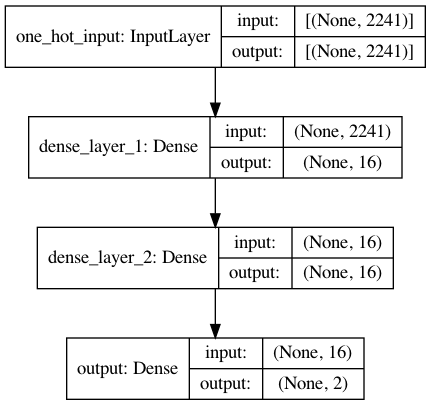

In [55]:
plot_model(model1, show_shapes=True)

### A few hyperparameters for network training

- Batch size
- Epoch
- Validation Split Ratio

In [56]:
BATCH_SIZE=512
EPOCHS=10
VALIDATION_SPLIT=0.2

In [57]:
history1 = model1.fit(X_train2, y_train2, 
                    batch_size=BATCH_SIZE, 
                    epochs=EPOCHS, verbose=2,
                   validation_split = VALIDATION_SPLIT)

Epoch 1/20
4579/4579 - 12s - loss: 0.0727 - accuracy: 0.9718 - val_loss: 0.0508 - val_accuracy: 0.9806
Epoch 2/20
4579/4579 - 8s - loss: 0.0447 - accuracy: 0.9830 - val_loss: 0.0416 - val_accuracy: 0.9844
Epoch 3/20
4579/4579 - 8s - loss: 0.0376 - accuracy: 0.9854 - val_loss: 0.0380 - val_accuracy: 0.9855
Epoch 4/20
4579/4579 - 8s - loss: 0.0338 - accuracy: 0.9868 - val_loss: 0.0381 - val_accuracy: 0.9854
Epoch 5/20
4579/4579 - 8s - loss: 0.0310 - accuracy: 0.9876 - val_loss: 0.0363 - val_accuracy: 0.9863
Epoch 6/20
4579/4579 - 8s - loss: 0.0287 - accuracy: 0.9885 - val_loss: 0.0356 - val_accuracy: 0.9867
Epoch 7/20
4579/4579 - 8s - loss: 0.0269 - accuracy: 0.9891 - val_loss: 0.0352 - val_accuracy: 0.9870
Epoch 8/20
4579/4579 - 8s - loss: 0.0256 - accuracy: 0.9896 - val_loss: 0.0342 - val_accuracy: 0.9875
Epoch 9/20
4579/4579 - 8s - loss: 0.0245 - accuracy: 0.9899 - val_loss: 0.0344 - val_accuracy: 0.9878
Epoch 10/20
4579/4579 - 8s - loss: 0.0235 - accuracy: 0.9902 - val_loss: 0.0345 -

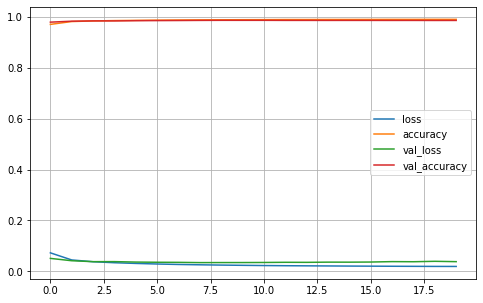

In [58]:
plot2(history1)

In [59]:
model1.evaluate(X_test2, y_test2, batch_size=128, verbose=2)

1431/1431 - 2s - loss: 0.0364 - accuracy: 0.9876


[0.03635438531637192, 0.9876261949539185]

### Model 2: Embedding + RNN

- One Embedding Layer + One RNN Layer 
- With Text-to-Sequence inputs

![](../images/name-gender-classifier-dl/name-gender-classifier-dl.004.jpeg)

In [111]:
EMBEDDING_DIM = 128
model2 = Sequential()
model2.add(Embedding(input_dim=vocab_size, 
                     output_dim=EMBEDDING_DIM, 
                     input_length=max_len, 
                     mask_zero=True))
model2.add(layers.SimpleRNN(16, activation="relu", name="lstm_layer"))
model2.add(Dense(16, activation="relu", name="dense_layer"))
model2.add(Dense(1, activation="sigmoid", name="output"))

model2.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)

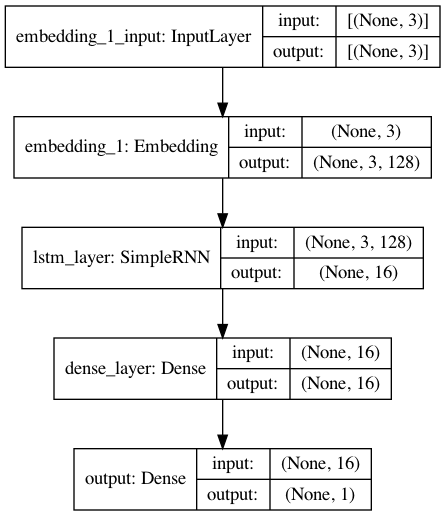

In [112]:
plot_model(model2, show_shapes=True)

In [113]:
history2 = model2.fit(X_train, y_train, 
                    batch_size=BATCH_SIZE, 
                    epochs=EPOCHS, verbose=2,
                    validation_split = VALIDATION_SPLIT)

Epoch 1/20
4579/4579 - 16s - loss: 0.0189 - accuracy: 0.9929 - val_loss: 0.0053 - val_accuracy: 0.9984
Epoch 2/20
4579/4579 - 14s - loss: 0.0027 - accuracy: 0.9992 - val_loss: 0.0029 - val_accuracy: 0.9992
Epoch 3/20
4579/4579 - 14s - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.0028 - val_accuracy: 0.9992
Epoch 4/20
4579/4579 - 14s - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.0033 - val_accuracy: 0.9991
Epoch 5/20
4579/4579 - 14s - loss: 7.8076e-04 - accuracy: 0.9997 - val_loss: 0.0022 - val_accuracy: 0.9995
Epoch 6/20
4579/4579 - 14s - loss: 6.2756e-04 - accuracy: 0.9998 - val_loss: 0.0024 - val_accuracy: 0.9995
Epoch 7/20
4579/4579 - 14s - loss: 4.5845e-04 - accuracy: 0.9999 - val_loss: 0.0027 - val_accuracy: 0.9994
Epoch 8/20
4579/4579 - 14s - loss: 3.9266e-04 - accuracy: 0.9999 - val_loss: 0.0025 - val_accuracy: 0.9995
Epoch 9/20
4579/4579 - 15s - loss: 2.9708e-04 - accuracy: 0.9999 - val_loss: 0.0025 - val_accuracy: 0.9995
Epoch 10/20
4579/4579 - 15s - loss: 2.7430e-04 - accu

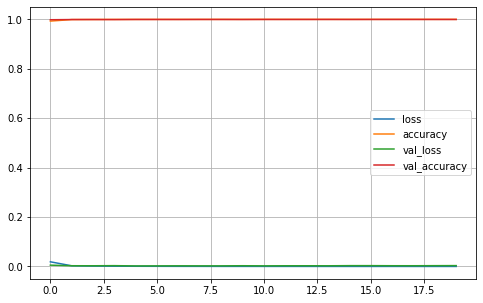

In [114]:
plot2(history2)

In [115]:
model2.evaluate(X_test, y_test, batch_size=128, verbose=2)

1431/1431 - 1s - loss: 0.0040 - accuracy: 0.9996


[0.004011294338852167, 0.9995522499084473]

### Model 3: Regularization and Dropout

- Previous two examples clearly show overfitting of the models because the model performance on the validation set starts to stall after the first few epochs.
- We can implement regularization and dropouts in our network definition to avoid overfitting.

In [34]:
EMBEDDING_DIM = 128
model3 = Sequential()
model3.add(Embedding(input_dim=vocab_size, 
                     output_dim=EMBEDDING_DIM, 
                     input_length=max_len, 
                     mask_zero=True))
model3.add(layers.SimpleRNN(16, activation="relu", name="lstm_layer", dropout=0.2, recurrent_dropout=0.2))
model3.add(Dense(16, activation="relu", name="dense_layer"))
model3.add(Dense(1, activation="sigmoid", name="output"))

model3.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)

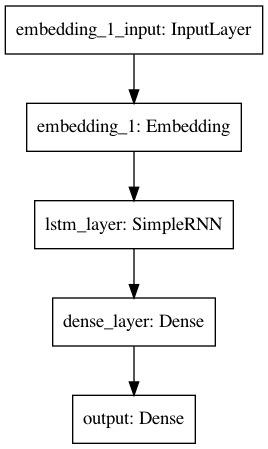

In [35]:
plot_model(model3)

In [36]:
history3 = model3.fit(X_train, y_train, 
                    batch_size=BATCH_SIZE, 
                    epochs=EPOCHS, verbose=2,
                    validation_split = VALIDATION_SPLIT)

Epoch 1/20
40/40 - 2s - loss: 0.6195 - accuracy: 0.6271 - val_loss: 0.5489 - val_accuracy: 0.6412
Epoch 2/20
40/40 - 0s - loss: 0.5249 - accuracy: 0.6642 - val_loss: 0.4955 - val_accuracy: 0.7671
Epoch 3/20
40/40 - 0s - loss: 0.4845 - accuracy: 0.7661 - val_loss: 0.4693 - val_accuracy: 0.7703
Epoch 4/20
40/40 - 0s - loss: 0.4598 - accuracy: 0.7797 - val_loss: 0.4505 - val_accuracy: 0.7766
Epoch 5/20
40/40 - 0s - loss: 0.4432 - accuracy: 0.7807 - val_loss: 0.4464 - val_accuracy: 0.7718
Epoch 6/20
40/40 - 0s - loss: 0.4338 - accuracy: 0.7860 - val_loss: 0.4348 - val_accuracy: 0.7931
Epoch 7/20
40/40 - 0s - loss: 0.4261 - accuracy: 0.7907 - val_loss: 0.4310 - val_accuracy: 0.7931
Epoch 8/20
40/40 - 0s - loss: 0.4206 - accuracy: 0.7970 - val_loss: 0.4293 - val_accuracy: 0.7946
Epoch 9/20
40/40 - 0s - loss: 0.4223 - accuracy: 0.7972 - val_loss: 0.4262 - val_accuracy: 0.7923
Epoch 10/20
40/40 - 0s - loss: 0.4153 - accuracy: 0.8004 - val_loss: 0.4337 - val_accuracy: 0.7766
Epoch 11/20
40/40 -

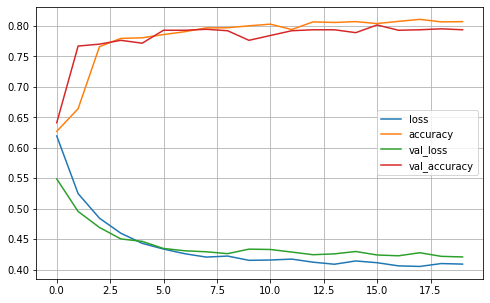

In [37]:
plot2(history3)

In [38]:
model3.evaluate(X_test, y_test, batch_size=128, verbose=2)

13/13 - 0s - loss: 0.4074 - accuracy: 0.8074


[0.4073854982852936, 0.8074260354042053]

### Model 4: Improve the Models

- In addition to regularization and dropouts, we can further improve the model by increasing the model complexity.
- In particular, we can increase the depths and widths of the network layers.
- Let's try stack two RNN layers.

In [39]:
EMBEDDING_DIM = 128
model4 = Sequential()
model4.add(Embedding(input_dim=vocab_size, 
                     output_dim=EMBEDDING_DIM, 
                     input_length=max_len, 
                     mask_zero=True))
model4.add(layers.SimpleRNN(16, activation="relu", name="lstm_layer_1", 
                            dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model4.add(layers.SimpleRNN(16, activation="relu", name="lstm_layer_2", 
                            dropout=0.2, recurrent_dropout=0.2))
model4.add(Dense(1, activation="sigmoid", name="output"))
model4.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)

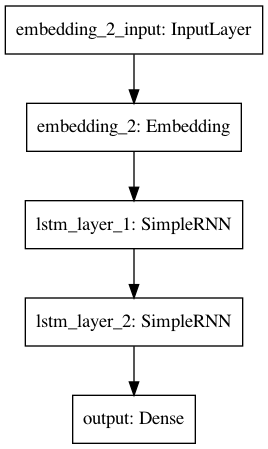

In [40]:
plot_model(model4)

In [41]:
history4 = model4.fit(X_train, y_train, 
                    batch_size=BATCH_SIZE, 
                    epochs=EPOCHS, verbose=2,
                    validation_split = VALIDATION_SPLIT)

Epoch 1/20
40/40 - 3s - loss: 0.6870 - accuracy: 0.6170 - val_loss: 0.6689 - val_accuracy: 0.7364
Epoch 2/20
40/40 - 0s - loss: 0.6519 - accuracy: 0.7341 - val_loss: 0.6269 - val_accuracy: 0.7750
Epoch 3/20
40/40 - 0s - loss: 0.5970 - accuracy: 0.7618 - val_loss: 0.5502 - val_accuracy: 0.7734
Epoch 4/20
40/40 - 0s - loss: 0.5222 - accuracy: 0.7689 - val_loss: 0.4882 - val_accuracy: 0.7758
Epoch 5/20
40/40 - 0s - loss: 0.4833 - accuracy: 0.7750 - val_loss: 0.4643 - val_accuracy: 0.7789
Epoch 6/20
40/40 - 0s - loss: 0.4689 - accuracy: 0.7815 - val_loss: 0.4557 - val_accuracy: 0.7836
Epoch 7/20
40/40 - 0s - loss: 0.4560 - accuracy: 0.7840 - val_loss: 0.4544 - val_accuracy: 0.7828
Epoch 8/20
40/40 - 0s - loss: 0.4532 - accuracy: 0.7870 - val_loss: 0.4545 - val_accuracy: 0.7836
Epoch 9/20
40/40 - 0s - loss: 0.4447 - accuracy: 0.7937 - val_loss: 0.4496 - val_accuracy: 0.7876
Epoch 10/20
40/40 - 0s - loss: 0.4490 - accuracy: 0.7889 - val_loss: 0.4492 - val_accuracy: 0.7844
Epoch 11/20
40/40 -

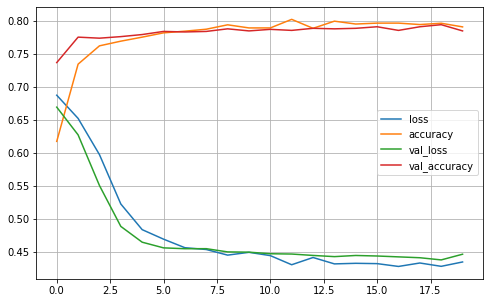

In [42]:
plot2(history4)

In [43]:
model4.evaluate(X_test, y_test, batch_size=128, verbose=2)

13/13 - 0s - loss: 0.4397 - accuracy: 0.7885


[0.43966466188430786, 0.7885462641716003]

### Model 5: Bidirectional

- Now let's try the more sophisticated RNN, LSTM, and with birectional computing.
- And add more nodes to the LSTM layer.

In [44]:
EMBEDDING_DIM = 128
model5 = Sequential()
model5.add(Embedding(input_dim=vocab_size, 
                     output_dim=EMBEDDING_DIM, 
                     input_length=max_len, 
                     mask_zero=True))
model5.add(layers.Bidirectional(LSTM(32, activation="relu", name="lstm_layer", dropout=0.2, recurrent_dropout=0.2)))
model5.add(Dense(1, activation="sigmoid", name="output"))

model5.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)

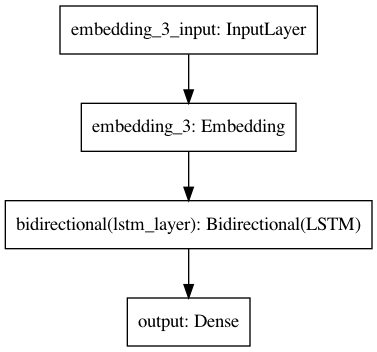

In [45]:
plot_model(model5)

In [46]:
history5 = model5.fit(X_train, y_train, 
                    batch_size=BATCH_SIZE, 
                    epochs=EPOCHS, verbose=2,
                    validation_split = VALIDATION_SPLIT)

Epoch 1/20
40/40 - 7s - loss: 0.6414 - accuracy: 0.6271 - val_loss: 0.5996 - val_accuracy: 0.6452
Epoch 2/20
40/40 - 1s - loss: 0.5327 - accuracy: 0.7140 - val_loss: 0.4618 - val_accuracy: 0.7718
Epoch 3/20
40/40 - 1s - loss: 0.4513 - accuracy: 0.7854 - val_loss: 0.4434 - val_accuracy: 0.7805
Epoch 4/20
40/40 - 1s - loss: 0.4318 - accuracy: 0.7941 - val_loss: 0.4355 - val_accuracy: 0.7954
Epoch 5/20
40/40 - 1s - loss: 0.4224 - accuracy: 0.7976 - val_loss: 0.4345 - val_accuracy: 0.8025
Epoch 6/20
40/40 - 1s - loss: 0.4148 - accuracy: 0.8004 - val_loss: 0.4271 - val_accuracy: 0.7876
Epoch 7/20
40/40 - 1s - loss: 0.4087 - accuracy: 0.8084 - val_loss: 0.4253 - val_accuracy: 0.7891
Epoch 8/20
40/40 - 1s - loss: 0.4065 - accuracy: 0.8106 - val_loss: 0.4222 - val_accuracy: 0.7891
Epoch 9/20
40/40 - 1s - loss: 0.4027 - accuracy: 0.8070 - val_loss: 0.4220 - val_accuracy: 0.7884
Epoch 10/20
40/40 - 1s - loss: 0.4012 - accuracy: 0.8118 - val_loss: 0.4195 - val_accuracy: 0.7939
Epoch 11/20
40/40 -

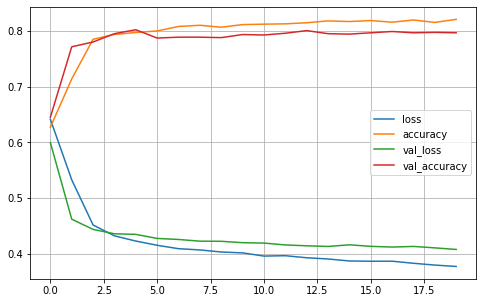

In [47]:
plot2(history5)

In [48]:
model5.evaluate(X_test, y_test, batch_size=128, verbose=2)

13/13 - 0s - loss: 0.3951 - accuracy: 0.8125


[0.3950510621070862, 0.8124606609344482]

## Check Embeddings

- Compared to one-hot encodings of characters, embeddings may include more information relating to the characteristics of the characters.
- We can extract the embedding layer and apply dimensional reduction techniques (i.e., TSNE) to see how embeddings capture the relationships in-between characters.

In [49]:
X_test[10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 9, 9, 3, 2], dtype=int32)

In [50]:
ind2char = tokenizer.index_word
[ind2char.get(i) for i in X_test[10] if ind2char.get(i)!= None ]

['n', 'e', 's', 's', 'i', 'e']

In [51]:
tokenizer.texts_to_sequences('Alvin')

[[1], [6], [20], [3], [4]]

In [52]:
char_vectors = model5.layers[0].get_weights()[0]
char_vectors.shape

(29, 128)

In [53]:
labels = [char for (ind, char) in tokenizer.index_word.items()]
labels.insert(0,None)
labels

[None,
 'a',
 'e',
 'i',
 'n',
 'r',
 'l',
 'o',
 't',
 's',
 'd',
 'm',
 'y',
 'h',
 'c',
 'b',
 'u',
 'g',
 'k',
 'j',
 'v',
 'f',
 'p',
 'w',
 'z',
 'x',
 'q',
 '-',
 ' ']

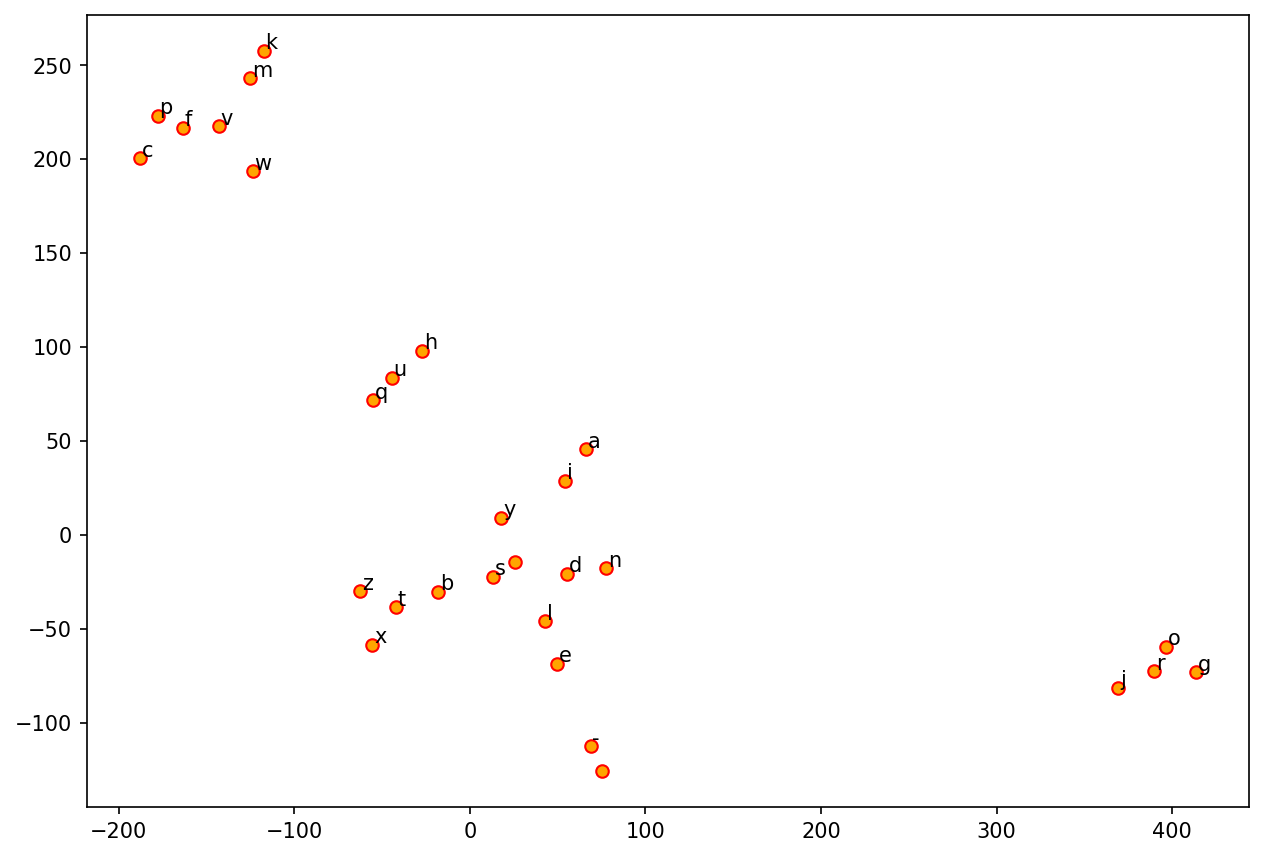

In [54]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(char_vectors)
labels = labels

plt.figure(figsize=(10, 7), dpi=150)
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

## Issues of Word/Character Representations

- One-hot encoding does not indicate semantic relationships between characters.
- For deep learning NLP, it is preferred to convert one-hot encodings of words/characters into embeddings, which are argued to include more semantic information of the tokens.
- Now the question is how to train and create better word embeddings. We will come back to this issue later.

## Hyperparameter Tuning

:::{note}

Please install keras tuner module in your current conda:
```
pip install -U keras-tuner
```

:::

- Like feature-based ML methods, neural networks also come with many hyperparameters, which require default values.
- Typical hyperparameters include:
    - Number of nodes for the layer
    - Learning Rates
- We can utilize the module, [`keras-tuner`](https://keras-team.github.io/keras-tuner/documentation/tuners/), to fine-tune the hyperparameters.

- Steps for Keras Tuner
    - First, wrap the model definition in a function, which takes a single `hp` argument. 
    - Inside this function, replace any value we want to tune with a call to hyperparameter sampling methods, e.g. `hp.Int()` or `hp.Choice()`. The function should return a compiled model.
    - Next, instantiate a tuner object specifying your optimization objective and other search parameters.
    - Finally, start the search with the `search()` method, which takes the same arguments as `Model.fit()` in keras.
    - When search is over, we can retrieve the best model and a summary of the results from the `tunner`.


In [55]:
import kerastuner

In [56]:
## Wrap model definition in a function
## and specify the parameters needed for tuning
# def build_model(hp):
#     model1 = keras.Sequential()
#     model1.add(keras.Input(shape=(max_len,)))
#     model1.add(layers.Dense(hp.Int('units', min_value=32, max_value=128, step=32), activation="relu", name="dense_layer_1"))
#     model1.add(layers.Dense(hp.Int('units', min_value=32, max_value=128, step=32), activation="relu", name="dense_layer_2"))
#     model1.add(layers.Dense(2, activation="softmax", name="output"))
#     model1.compile(
#         optimizer=keras.optimizers.Adam(
#             hp.Choice('learning_rate',
#                       values=[1e-2, 1e-3, 1e-4])),
#         loss='sparse_categorical_crossentropy',
#         metrics=['accuracy'])
#     return model1

def build_model(hp):
    m= Sequential()
    m.add(Embedding(input_dim=vocab_size, 
                    output_dim=hp.Int('output_dim', min_value=32, max_value=128, step=32), 
                    input_length=max_len, 
                    mask_zero=True))
    m.add(layers.Bidirectional(LSTM(
        hp.Int('units', min_value=16, max_value=64, step=16),
        activation="relu", 
        dropout=0.2, 
        recurrent_dropout=0.2)))
    m.add(Dense(2, activation="softmax", name="output"))

    m.compile(
        loss=keras.losses.SparseCategoricalCrossentropy(),
        optimizer=keras.optimizers.Adam(lr=0.001),
        metrics=["accuracy"]
    )
    return m

In [57]:
## This is to clean up the temp dir from the tuner
## Every time we re-start the tunner, it's better to keep the temp dir clean

import os
import shutil

if os.path.isdir('my_dir'):
    shutil.rmtree('my_dir')
    

- The `max_trials` variable represents the number of hyperparameter combinations that will be tested by the tuner.
- The `execution_per_trial` variable is the number of models that should be built and fit for each trial for robustness purposes.

In [58]:
## Instantiate the tunner

tuner = kerastuner.tuners.RandomSearch(
  build_model,
  objective='val_accuracy',
  max_trials=10,
  executions_per_trial=2,
  directory='my_dir')

In [59]:
## Check the tuner's search space
tuner.search_space_summary()

Search space summary
Default search space size: 2
output_dim (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': None}
units (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 64, 'step': 16, 'sampling': None}


In [60]:
%%time
## Start tuning with the tuner
tuner.search(X_train, y_train, validation_split=0.2, batch_size=128)

Trial 10 Complete [00h 00m 15s]
val_accuracy: 0.6420141458511353

Best val_accuracy So Far: 0.645948052406311
Total elapsed time: 00h 02m 29s
INFO:tensorflow:Oracle triggered exit
CPU times: user 3min 10s, sys: 4.9 s, total: 3min 15s
Wall time: 2min 29s


In [61]:
## Retrieve the best models from the tuner
models = tuner.get_best_models(num_models=2)

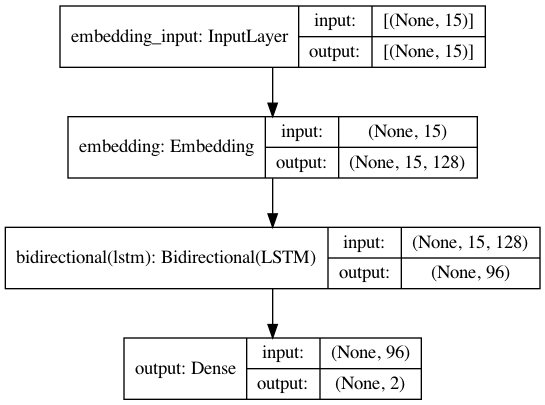

In [62]:
plot_model(models[0], show_shapes=True)

In [63]:
## Retrieve the summary of results from the tuner
tuner.results_summary()

Results summary
Results in my_dir/untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
output_dim: 128
units: 48
Score: 0.645948052406311
Trial summary
Hyperparameters:
output_dim: 128
units: 32
Score: 0.6451612710952759
Trial summary
Hyperparameters:
output_dim: 128
units: 16
Score: 0.6435877084732056
Trial summary
Hyperparameters:
output_dim: 96
units: 48
Score: 0.643194317817688
Trial summary
Hyperparameters:
output_dim: 96
units: 32
Score: 0.6420141458511353
Trial summary
Hyperparameters:
output_dim: 64
units: 32
Score: 0.6412273645401001
Trial summary
Hyperparameters:
output_dim: 32
units: 64
Score: 0.6412273645401001
Trial summary
Hyperparameters:
output_dim: 32
units: 16
Score: 0.6412273645401001
Trial summary
Hyperparameters:
output_dim: 32
units: 48
Score: 0.6412273645401001
Trial summary
Hyperparameters:
output_dim: 32
units: 32
Score: 0.6412273645401001


## Explanation

### Train Model with the Tuned Hyperparameters

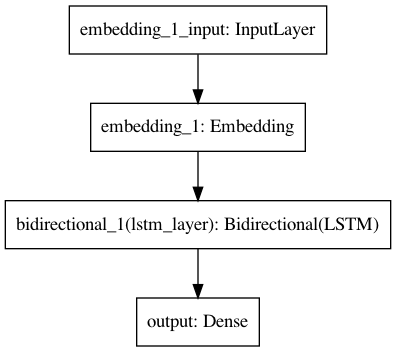

In [64]:
EMBEDDING_DIM = 128
model6 = Sequential()
model6.add(Embedding(input_dim=vocab_size, 
                     output_dim=EMBEDDING_DIM, 
                     input_length=max_len, 
                     mask_zero=True))
model6.add(layers.Bidirectional(LSTM(64, activation="relu", name="lstm_layer", dropout=0.2, recurrent_dropout=0.2)))
model6.add(Dense(2, activation="softmax", name="output"))

model6.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)
plot_model(model6)

In [65]:
history6 = model6.fit(X_train, y_train, 
                    batch_size=BATCH_SIZE, 
                    epochs=EPOCHS, verbose=2,
                    validation_split = VALIDATION_SPLIT)

Epoch 1/20
40/40 - 7s - loss: 0.6451 - accuracy: 0.6176 - val_loss: 0.6015 - val_accuracy: 0.6467
Epoch 2/20
40/40 - 2s - loss: 0.5283 - accuracy: 0.7260 - val_loss: 0.4695 - val_accuracy: 0.7726
Epoch 3/20
40/40 - 2s - loss: 0.4704 - accuracy: 0.7817 - val_loss: 0.4577 - val_accuracy: 0.7852
Epoch 4/20
40/40 - 2s - loss: 0.4370 - accuracy: 0.7927 - val_loss: 0.4492 - val_accuracy: 0.7687
Epoch 5/20
40/40 - 2s - loss: 0.4294 - accuracy: 0.7933 - val_loss: 0.4391 - val_accuracy: 0.7899
Epoch 6/20
40/40 - 2s - loss: 0.4208 - accuracy: 0.8019 - val_loss: 0.4303 - val_accuracy: 0.7954
Epoch 7/20
40/40 - 2s - loss: 0.4178 - accuracy: 0.8013 - val_loss: 0.4278 - val_accuracy: 0.7994
Epoch 8/20
40/40 - 2s - loss: 0.4103 - accuracy: 0.8041 - val_loss: 0.4304 - val_accuracy: 0.8002
Epoch 9/20
40/40 - 2s - loss: 0.4089 - accuracy: 0.8059 - val_loss: 0.4210 - val_accuracy: 0.8002
Epoch 10/20
40/40 - 2s - loss: 0.4013 - accuracy: 0.8145 - val_loss: 0.4184 - val_accuracy: 0.7939
Epoch 11/20
40/40 -

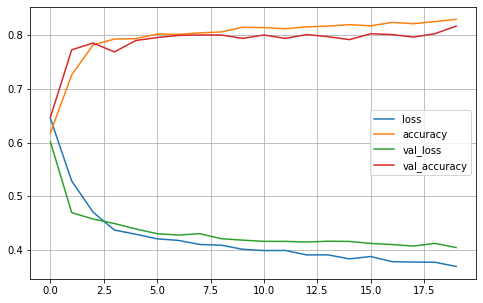

In [66]:
plot2(history6)

### Interpret the Model

In [120]:
from lime.lime_text import LimeTextExplainer

explainer = LimeTextExplainer(class_names=['Male'], char_level=True)

In [121]:
def model_predict_pipeline(text):
    _seq = tokenizer.texts_to_sequences(text)
    _seq_pad = keras.preprocessing.sequence.pad_sequences(_seq, maxlen=max_len)
    #return np.array([[float(1-x), float(x)] for x in model.predict(np.array(_seq_pad))])
    return model2.predict(np.array(_seq_pad))



# np.array(sequence.pad_sequences(
#     tokenizer.texts_to_sequences([n for (n,l) in test_set]),
#     maxlen = max_len)).astype('float32')

In [62]:
reversed_word_index = dict([(index, word) for (word, index) in tokenizer.word_index.items()])

In [63]:
text_id =305

In [64]:
X_test[text_id]

array([126, 112, 101], dtype=int32)

In [77]:
X_test_texts[text_id]

'潘少斌'

In [78]:
' '.join([reversed_word_index.get(i, '?') for i in X_test[text_id]])

'潘 少 斌'

In [118]:
model_predict_pipeline([X_test_texts[text_id]])

array([[1.]], dtype=float32)

In [122]:
exp = explainer.explain_instance(
X_test_texts[text_id], model_predict_pipeline, num_features=100, top_labels=1)
exp.show_in_notebook(text=True)

In [102]:
y_test[text_id]

1

In [131]:
exp = explainer.explain_instance(
'陳宥欣', model_predict_pipeline, num_features=100, top_labels=1)
exp.show_in_notebook(text=True)

In [124]:
exp = explainer.explain_instance(
'李安芬', model_predict_pipeline, num_features=2, top_labels=1)
exp.show_in_notebook(text=True)

In [128]:
exp = explainer.explain_instance(
'林月名', model_predict_pipeline, num_features=2, top_labels=1)
exp.show_in_notebook(text=True)

In [136]:
exp = explainer.explain_instance(
'蔡英文', model_predict_pipeline, num_features=2, top_labels=1)
exp.show_in_notebook(text=True)

## References

- Chollet (2017), Ch 3 and  Ch 4